# IPL Winning Team Predictor

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 0.24.1
Uninstalling scikit-learn-0.24.1:
  Successfully uninstalled scikit-learn-0.24.1


In [3]:
!pip install -U scikit-learn==0.24.1


  Using cached scikit_learn-0.24.1-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)


## Reading the csv files 

### Matches from 2008 to 2021

In [4]:
matches_till_2021 = pd.read_csv("Dataset/IPL_Matches_2008_2021.csv")
matches_till_2021.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


### Matches played in 2022

In [5]:
matches_2022 = pd.read_csv("Dataset/IPL_Matches_2022.csv")
matches_2022.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304085,Pune,2022-04-26,2022,39,Rajasthan Royals,Royal Challengers Bangalore,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,field,N,Rajasthan Royals,Runs,29,NaN,R Parag,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",BNJ Oxenford,KN Ananthapadmanabhan
1,1304084,Mumbai,2022-04-25,2022,38,Punjab Kings,Chennai Super Kings,"Wankhede Stadium, Mumbai",Chennai Super Kings,field,N,Punjab Kings,Runs,11,NaN,S Dhawan,"['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...","['RD Gaikwad', 'RV Uthappa', 'MJ Santner', 'S ...",M Erasmus,Tapan Sharma
2,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Lucknow Super Giants,Runs,36,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid
3,1304082,Mumbai,2022-04-23,2022,36,Royal Challengers Bangalore,Sunrisers Hyderabad,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,9,NaN,M Jansen,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Chirra Ravikanthreddy,J Madanagopal
4,1304081,Navi Mumbai,2022-04-23,2022,35,Gujarat Titans,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,bat,N,Gujarat Titans,Runs,8,NaN,Rashid Khan,"['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...","['SW Billings', 'SP Narine', 'SS Iyer', 'N Ran...",KN Ananthapadmanabhan,UV Gandhe


### Combining the 2 datasets - (2008 to 2021) & 2022 matches played

In [6]:
frames = [matches_2022, matches_till_2021]
matches = pd.concat(frames)
matches.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304085,Pune,2022-04-26,2022,39,Rajasthan Royals,Royal Challengers Bangalore,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,field,N,Rajasthan Royals,Runs,29.0,NaN,R Parag,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",BNJ Oxenford,KN Ananthapadmanabhan
1,1304084,Mumbai,2022-04-25,2022,38,Punjab Kings,Chennai Super Kings,"Wankhede Stadium, Mumbai",Chennai Super Kings,field,N,Punjab Kings,Runs,11.0,NaN,S Dhawan,"['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...","['RD Gaikwad', 'RV Uthappa', 'MJ Santner', 'S ...",M Erasmus,Tapan Sharma
2,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Lucknow Super Giants,Runs,36.0,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid
3,1304082,Mumbai,2022-04-23,2022,36,Royal Challengers Bangalore,Sunrisers Hyderabad,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,9.0,NaN,M Jansen,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Chirra Ravikanthreddy,J Madanagopal
4,1304081,Navi Mumbai,2022-04-23,2022,35,Gujarat Titans,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,bat,N,Gujarat Titans,Runs,8.0,NaN,Rashid Khan,"['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...","['SW Billings', 'SP Narine', 'SS Iyer', 'N Ran...",KN Ananthapadmanabhan,UV Gandhe


### Displaying the IPL Seasons

In [7]:
# First, I'm following a uniform standard for the seasons
# Extracting the year part from the dates

matches['Season'] = matches['Season'].replace('2007/08','2008')
matches['Season'] = matches['Season'].str.replace('2020/21','2020')
matches['Season'] = matches['Season'].str.replace('2009/10','2010')
matches['Season'] = matches['Season'].replace(np.nan, '2022')

matches.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304085,Pune,2022-04-26,2022,39,Rajasthan Royals,Royal Challengers Bangalore,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,field,N,Rajasthan Royals,Runs,29.0,NaN,R Parag,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",BNJ Oxenford,KN Ananthapadmanabhan
1,1304084,Mumbai,2022-04-25,2022,38,Punjab Kings,Chennai Super Kings,"Wankhede Stadium, Mumbai",Chennai Super Kings,field,N,Punjab Kings,Runs,11.0,NaN,S Dhawan,"['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...","['RD Gaikwad', 'RV Uthappa', 'MJ Santner', 'S ...",M Erasmus,Tapan Sharma
2,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Lucknow Super Giants,Runs,36.0,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid
3,1304082,Mumbai,2022-04-23,2022,36,Royal Challengers Bangalore,Sunrisers Hyderabad,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,9.0,NaN,M Jansen,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Chirra Ravikanthreddy,J Madanagopal
4,1304081,Navi Mumbai,2022-04-23,2022,35,Gujarat Titans,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,bat,N,Gujarat Titans,Runs,8.0,NaN,Rashid Khan,"['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...","['SW Billings', 'SP Narine', 'SS Iyer', 'N Ran...",KN Ananthapadmanabhan,UV Gandhe


In [8]:
matches['Season'].unique()


array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008'],
      dtype=object)

### Ball by Ball data

In [9]:
delivery_till_2021 = pd.read_csv('Dataset/IPL_Ball_by_Ball_2008_2021.csv')
delivery_2022 = pd.read_csv("Dataset/IPL_Ball_by_Ball_2022.csv")

frames = [delivery_2022, delivery_till_2021]
delivery = pd.concat(frames)
delivery.head()


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304085,1,0,1,JC Buttler,Shahbaz Ahmed,D Padikkal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1304085,1,0,2,D Padikkal,Shahbaz Ahmed,JC Buttler,wides,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1304085,1,0,3,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1304085,1,0,4,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1304085,1,0,5,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [10]:
delivery.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217479 entries, 0 to 208041
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 217479 non-null  int64 
 1   innings            217479 non-null  int64 
 2   overs              217479 non-null  int64 
 3   ballnumber         217479 non-null  int64 
 4   batter             217479 non-null  object
 5   bowler             217479 non-null  object
 6   non-striker        217479 non-null  object
 7   extra_type         11555 non-null   object
 8   batsman_run        217479 non-null  int64 
 9   extras_run         217479 non-null  int64 
 10  total_run          217479 non-null  int64 
 11  non_boundary       217479 non-null  int64 
 12  isWicketDelivery   217479 non-null  int64 
 13  player_out         10727 non-null   object
 14  kind               10727 non-null   object
 15  fielders_involved  7654 non-null    object
 16  BattingTeam        2

## Adding the field 'BowlingTeam' in the delivery dataframe

In [11]:
#Creating a reduced data frame from matches, with the match ID and the participating teams
data = {
    'ID': matches['ID'],
    'Team1': matches['Team1'],
    'Team2': matches['Team2']
}

matches_subset = pd.DataFrame(data)


#Inner joining this reduced matches dataframe with deliveries dataframe on 'ID'
delivery['BowlingTeam'] = "" #Creating an empty attribute called BowlingTeam in deliveries
delivery = pd.merge(matches_subset, delivery, on='ID', how='inner')

#Filling the BowlingTeam attribute with the appropriate team names
for idx in delivery.index:
    delivery['BowlingTeam'][idx] = delivery['Team1'][idx] if delivery['BattingTeam'][idx] != delivery['Team1'][idx] else delivery['Team2'][idx]
        
delivery.drop(['Team1', 'Team2'], axis = 1)

delivery.head(10)

,ID,Team1,Team2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,1,JC Buttler,Shahbaz Ahmed,D Padikkal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
1,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,2,D Padikkal,Shahbaz Ahmed,JC Buttler,wides,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
2,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,3,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
3,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,4,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
4,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,5,D Padikkal,Shahbaz Ahmed,JC Buttler,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
5,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,6,JC Buttler,Shahbaz Ahmed,D Padikkal,NaN,2,0,2,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
6,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,0,7,JC Buttler,Shahbaz Ahmed,D Padikkal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
7,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,1,1,D Padikkal,Mohammed Siraj,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
8,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,1,2,D Padikkal,Mohammed Siraj,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
9,1304085,Rajasthan Royals,Royal Challengers Bangalore,1,1,3,D Padikkal,Mohammed Siraj,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore


## Since the above process took a lot of time to execute, we'll save the results of the data frame in a csv file

In [12]:
delivery.to_csv('Dataset/Processed_Data/Ball_By_Ball_Till_2022.csv')

## Import features for predicting the winning team
- Batting team
- Bowling team
- city
- Runs_left
- Balls_left
- wickets_left
- total_runs_x(Made by 1st inning team)
- current_run_rate(CRR)
- Required_run_rate(RRR)
- result(Batting team Win or not)

## Grouping these features

In [13]:
delivery.groupby(['ID','innings']).sum()['total_run']
##This will give the runs scored in innings 1 and 2 respectively in each match

ID       innings
335982   1          222
         2           82
335983   1          240
         2          207
335984   1          129
                   ... 
1304083  2          132
1304084  1          187
         2          176
1304085  1          144
         2          115
Name: total_run, Length: 1858, dtype: int64

In [14]:
# convert into dataframe by runnig reset_index()
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [15]:
total_score_df['total_run'] = total_score_df['total_run'] + 1 #Target

In [16]:
# Needed only 1st innings matches
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [17]:
match_df = matches.merge(total_score_df[['ID','total_run']], left_on = 'ID',right_on = 'ID')
match_df.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1304085,Pune,2022-04-26,2022,39,Rajasthan Royals,Royal Challengers Bangalore,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,field,...,Rajasthan Royals,Runs,29.0,NaN,R Parag,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",BNJ Oxenford,KN Ananthapadmanabhan,145
1,1304084,Mumbai,2022-04-25,2022,38,Punjab Kings,Chennai Super Kings,"Wankhede Stadium, Mumbai",Chennai Super Kings,field,...,Punjab Kings,Runs,11.0,NaN,S Dhawan,"['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...","['RD Gaikwad', 'RV Uthappa', 'MJ Santner', 'S ...",M Erasmus,Tapan Sharma,188
2,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,Lucknow Super Giants,Runs,36.0,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid,169
3,1304082,Mumbai,2022-04-23,2022,36,Royal Challengers Bangalore,Sunrisers Hyderabad,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,...,Sunrisers Hyderabad,Wickets,9.0,NaN,M Jansen,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Chirra Ravikanthreddy,J Madanagopal,69
4,1304081,Navi Mumbai,2022-04-23,2022,35,Gujarat Titans,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,bat,...,Gujarat Titans,Runs,8.0,NaN,Rashid Khan,"['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...","['SW Billings', 'SP Narine', 'SS Iyer', 'N Ran...",KN Ananthapadmanabhan,UV Gandhe,157


In [18]:
#Saving it as a CSV file so that this can be directly used in the future
match_df.to_csv('Dataset/Processed_Data/Matches_Till_2022.csv')

In [19]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Punjab Kings', 'Lucknow Super Giants',
       'Royal Challengers Bangalore', 'Gujarat Titans', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

### NOTE:
- Deccan Chargers -> Sunrises Hyderabad 
- Delhi Daredevils -> Delhi Capitals 
- Kings X1 Punjab -> Punjab Kings 
- {'Rising Pune Supergiants', 'Pune Warriors'} -> 'Rising Pune Supergiant'
- Gujarat Lions -> Gujarat Titans

In [20]:
teams=['Sunrisers Hyderabad',
       'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Kolkata Knight Riders',
       'Punjab Kings',
       'Chennai Super Kings',
       'Rajasthan Royals',
       'Delhi Capitals',
       'Lucknow Super Giants',
       'Gujarat Titans']
#Playing 10 teams

In [21]:
match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2']=match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1']=match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2']=match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1']=match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2']=match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['Team1']=match_df['Team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['Team2']=match_df['Team2'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['Team1']=match_df['Team1'].str.replace('Pune Warriors','Rising Pune Supergiant')
match_df['Team2']=match_df['Team2'].str.replace('Pune Warriors','Rising Pune Supergiant')

match_df['Team1']=match_df['Team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['Team2']=match_df['Team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')






In [22]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Punjab Kings', 'Lucknow Super Giants',
       'Royal Challengers Bangalore', 'Gujarat Titans', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala'], dtype=object)

## As per the playing 10 teams

In [23]:
match_df=match_df[match_df['Team1'].isin(teams)]
match_df=match_df[match_df['Team2'].isin(teams)]

In [24]:
match_df['Team1'].unique()
#Rising Pune Supergiant and Kochi Tuskers Kerala have been removed

array(['Rajasthan Royals', 'Punjab Kings', 'Lucknow Super Giants',
       'Royal Challengers Bangalore', 'Gujarat Titans', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Sunrisers Hyderabad'], dtype=object)

In [25]:
match_df.shape


(826, 21)

## Condensing the dataframe match_df.....We need only the city, winner and the target for prediction

In [26]:
match_df=match_df[['ID','City','WinningTeam','total_run']]
match_df

,ID,City,WinningTeam,total_run
0,1304085,Pune,Rajasthan Royals,145
1,1304084,Mumbai,Punjab Kings,188
2,1304083,Mumbai,Lucknow Super Giants,169
3,1304082,Mumbai,Sunrisers Hyderabad,69
4,1304081,Navi Mumbai,Gujarat Titans,157
...,...,...,...,...
910,335985,Mumbai,Royal Challengers Bangalore,166
911,335986,Kolkata,Kolkata Knight Riders,111
912,335984,Delhi,Delhi Daredevils,130
913,335983,Chandigarh,Chennai Super Kings,241


In [27]:
# Merging the delivery and match_df dataframes
delivery_df=match_df.merge(delivery,on='ID')

#We're concerned with the second innings
delivery_df = delivery_df[delivery_df['innings'] == 2]
delivery_df.head(5)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
123,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,1,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
124,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,2,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
125,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,3,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
126,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,4,V Kohli,...,4,0,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
127,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,5,V Kohli,...,4,0,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals


## Finding out the total runs made after each ball using cummulative sum

In [28]:
delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']
delivery_df['current_score']

123        0
124        0
125        0
126        4
127        8
          ..
196601    80
196602    81
196603    81
196604    82
196605    82
Name: current_score, Length: 94800, dtype: int64

In [29]:
delivery_df.head(5)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
123,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,1,V Kohli,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0
124,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,2,V Kohli,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0
125,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,3,V Kohli,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0
126,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,4,V Kohli,...,0,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,4
127,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,5,V Kohli,...,0,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,8


In [30]:
## Adding other necessary attributes
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

delivery_df['balls_left'] = 120 - (delivery_df['overs'] * 6 + delivery_df['ballnumber'])

delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out']=delivery_df['player_out'].astype('int')

wickets = delivery_df.groupby('ID').cumsum()['player_out'].values
delivery_df['wickets']= 10 - wickets

delivery_df.head(5)


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets
123,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,1,V Kohli,...,0,0,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0,145,119,10
124,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,2,V Kohli,...,0,0,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0,145,118,10
125,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,3,V Kohli,...,0,0,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,0,145,117,10
126,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,4,V Kohli,...,0,0,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,4,141,116,10
127,1304085,Pune,Rajasthan Royals,145,Rajasthan Royals,Royal Challengers Bangalore,2,0,5,V Kohli,...,0,0,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals,8,137,115,10


## Current Run Rate (CRR)

In [31]:
#crr= runs_made_till now/overs(in fraction)
delivery_df['crr'] = (delivery_df['current_score'] * 6)/(120 - delivery_df['balls_left'])
delivery_df['crr']

123       0.000000
124       0.000000
125       0.000000
126       6.000000
127       9.600000
            ...   
196601    5.393258
196602    5.400000
196603    5.340659
196604    5.406593
196605    5.347826
Name: crr, Length: 94800, dtype: float64

## Required Run Rate (RRR)

In [32]:
# rrr = runs_left / overs
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']
delivery_df['rrr']

123        7.310924
124        7.372881
125        7.435897
126        7.293103
127        7.147826
            ...    
196601    27.677419
196602    28.400000
196603    29.379310
196604    29.172414
196605    30.214286
Name: rrr, Length: 94800, dtype: float64

## Some stats

In [33]:
df = matches[(matches['WinningTeam'] == 'Chennai Super King') & (matches['Season'] == '2016') ].groupby(['Season'])['ID'].count()
df.empty
#Because in 2016 SRH won 

True

In [34]:
#Total matches played by Mumbai Indians Season Wise
matches[(matches['Team1'] == 'Mumbai Indians') | (matches['Team2'] == 'Mumbai Indians') ].groupby(['Season'])['ID'].count()


Season
2008    14
2009    13
2010    16
2011    16
2012    17
2013    19
2014    15
2015    16
2016    14
2017    17
2018    14
2019    16
2020    16
2021    14
2022     8
Name: ID, dtype: int64

## Match wins for each team in 2022 season

In [35]:
match_wins = matches[matches['Season']=='2022']['WinningTeam'].value_counts()
match_wins

#Note it's not a fully updated dataset....at this stage MI didn't win any match and hence is not in the list

Rajasthan Royals               6
Gujarat Titans                 6
Lucknow Super Giants           5
Sunrisers Hyderabad            5
Royal Challengers Bangalore    5
Punjab Kings                   4
Delhi Capitals                 3
Kolkata Knight Riders          3
Chennai Super Kings            2
Name: WinningTeam, dtype: int64

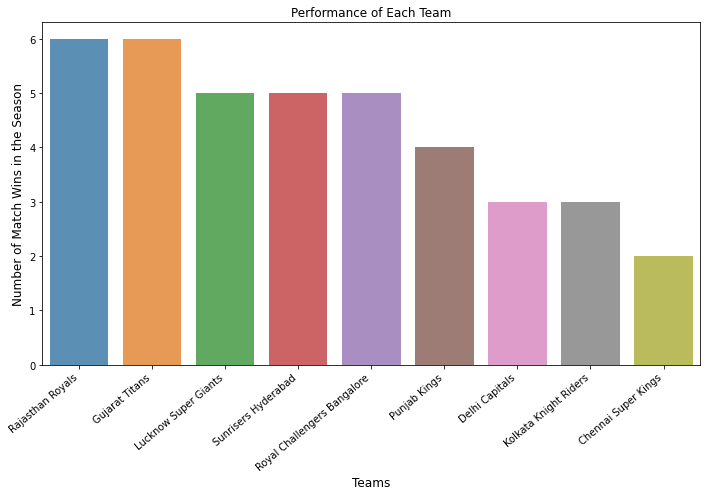

In [36]:
plt.figure(figsize=(10,7))
ax = sns.barplot(match_wins.index, match_wins.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Performance of Each Team')
plt.ylabel('Number of Match Wins in the Season', fontsize = 12)
plt.xlabel('Teams', fontsize = 12)
plt.tight_layout()
plt.show()

In [37]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

delivery_df['result'] = delivery_df.apply(result, axis = 1)
delivery_df['result']

123       0
124       0
125       0
126       0
127       0
         ..
196601    0
196602    0
196603    0
196604    0
196605    0
Name: result, Length: 94800, dtype: int64

## Final dataset after feature engineering, this will be used to train the ML model

In [38]:
# final_df = delivery_df[['Batting_Team','Bowling_team','City','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
# final_df

data = {
    'Batting_Team': delivery_df['BattingTeam'],
    'Bowling_team': delivery_df['BowlingTeam'],
    'City': delivery_df['City'],
    'runs_left': delivery_df['runs_left'],
    'balls_left': delivery_df['balls_left'],
    'wickets': delivery_df['wickets'],
    'total_runs_x': delivery_df['total_run_x'],
    'crr': delivery_df['crr'],
    'rrr': delivery_df['rrr'],
    'result': delivery_df['result'] 
}

final_df = pd.DataFrame(data)
final_df

# final_df['result'] shows the batting team in the 2nd Innings is a winner or not.

,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
123,Royal Challengers Bangalore,Rajasthan Royals,Pune,145,119,10,145,0.000000,7.310924,0
124,Royal Challengers Bangalore,Rajasthan Royals,Pune,145,118,10,145,0.000000,7.372881,0
125,Royal Challengers Bangalore,Rajasthan Royals,Pune,145,117,10,145,0.000000,7.435897,0
126,Royal Challengers Bangalore,Rajasthan Royals,Pune,141,116,10,145,6.000000,7.293103,0
127,Royal Challengers Bangalore,Rajasthan Royals,Pune,137,115,10,145,9.600000,7.147826,0
...,...,...,...,...,...,...,...,...,...,...
196601,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,143,31,1,223,5.393258,27.677419,0
196602,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,30,1,223,5.400000,28.400000,0
196603,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,29,1,223,5.340659,29.379310,0
196604,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,29,1,223,5.406593,29.172414,0


In [39]:
final_df = final_df.sample(final_df.shape[0])
final_df.isnull().sum()

Batting_Team       0
Bowling_team       0
City            6012
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr               11
result             0
dtype: int64

In [40]:
final_df.dropna(inplace = True)

final_df = final_df[final_df['balls_left']!=0]   # we don't want INF rrr
final_df

,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
111096,Kolkata Knight Riders,Chennai Super Kings,Ranchi,84,64,6,149,6.964286,7.875000,0
174836,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,84,47,5,158,6.082192,10.723404,0
110826,Mumbai Indians,Kings XI Punjab,Mumbai,161,112,9,169,6.000000,8.625000,1
71366,Mumbai Indians,Gujarat Lions,Rajkot,15,11,4,154,7.651376,8.181818,1
82490,Kings XI Punjab,Kolkata Knight Riders,Kolkata,22,12,4,165,7.944444,11.000000,0
...,...,...,...,...,...,...,...,...,...,...
171670,Kolkata Knight Riders,Chennai Super Kings,Centurion,54,26,7,189,8.617021,12.461538,1
43010,Chennai Super Kings,Sunrisers Hyderabad,Chennai,50,35,8,176,8.894118,8.571429,1
42467,Rajasthan Royals,Kolkata Knight Riders,Kolkata,121,83,9,176,8.918919,8.746988,1
147757,Rajasthan Royals,Chennai Super Kings,Jaipur,144,79,8,197,7.756098,10.936709,0


In [41]:
final_df.to_csv('Dataset/Processed_Data/Final_Dataset_After_Feature_Engineering.csv')